已连接到 Python 3.9.6

File loaded successfully!
Columns in the file:
Index(['id', 'dataset_id', 'decimalLongitude', 'decimalLatitude', 'date_start',
       'date_mid', 'date_end', 'date_year', 'scientificName',
       'originalScientificName',
       ...
       'specificEpithet', 'infraspecificEpithet', 'verbatimTaxonRank',
       'scientificNameAuthorship', 'vernacularName', 'nomenclaturalCode',
       'taxonomicStatus', 'nomenclaturalStatus', 'taxonRemarks', 'geometry'],
      dtype='object', length=268)
First few rows of the dataset:
                                     id                            dataset_id  \
0  fdc05cb4-a10b-4fe9-9370-0ca72be588e8  a9a3bdc6-209f-4c66-aafd-ce5271cb63b3   
1  a64fd2df-2524-45a7-bb53-f204744f1a20  43b58971-4fda-4210-a6ef-654fe0ce226d   
2  65a42b5a-6a3f-4b68-bc9a-9d711e75eb13  85cad20d-d596-482e-bb90-7475de8720d7   
3  6ab6f74d-fd24-432b-be21-61dee2e62b67  2fd06604-7d20-4712-9f68-eae9ae336bb5   
4  5c25cc21-9e19-4f5c-9cf8-de48cddf92bd  28994fa2-d07a-45c9-84b7-3fff3d728

<ipython-input-1-693e3af03572>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.values, y=species_counts.index, palette="viridis")


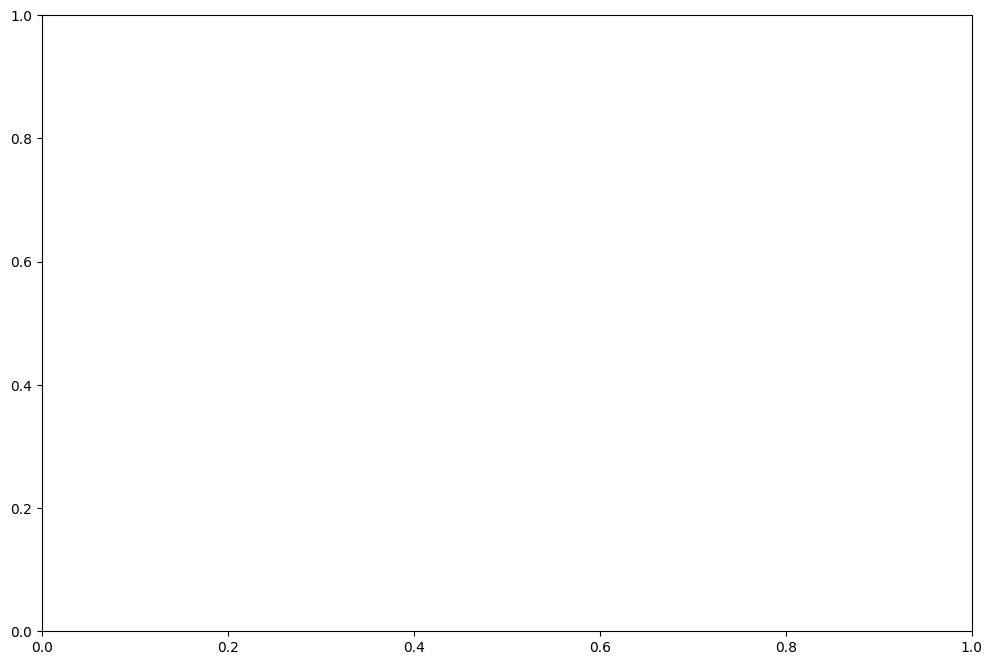

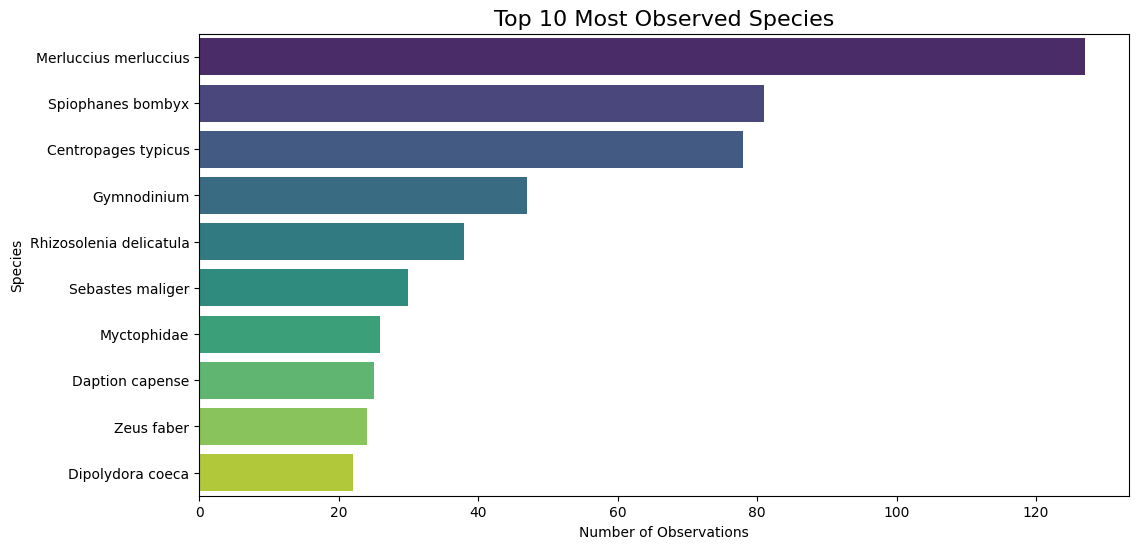

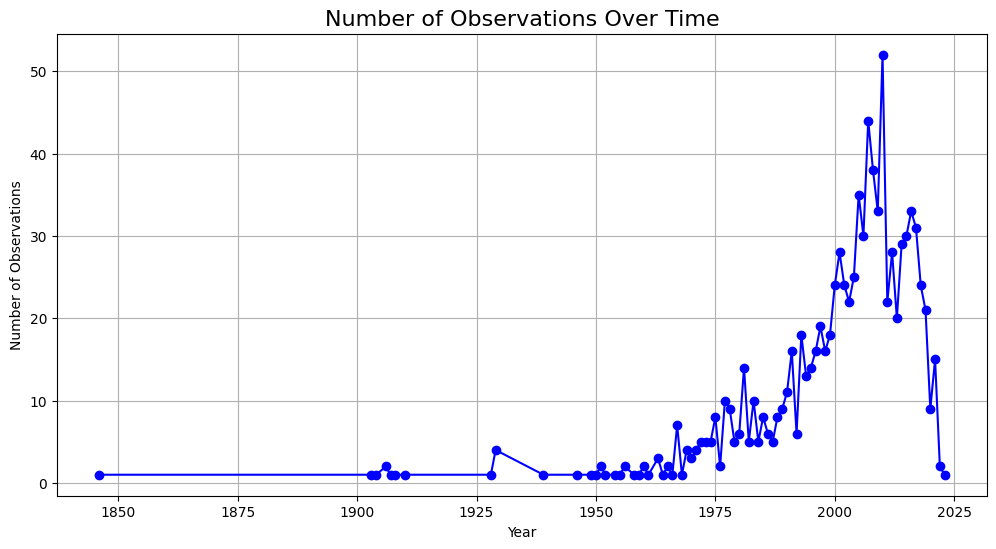

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 文件路径
file_path = "/Users/yjjjknkn/Downloads/000.part"  # 替换为实际路径和文件名

# 读取文件
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

# 检查列名
print("Columns in the file:")
print(df.columns)

# 检查前几行数据
print("First few rows of the dataset:")
print(df.head())

# 转换时间戳为日期时间
for col in ['date_start', 'date_mid', 'date_end']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], unit='ms', errors='coerce')

# 检查转换后的时间字段
print(df[['date_start', 'date_mid', 'date_end']].head())

# 地理分布地图
if 'geometry' in df.columns:
    try:
        df['geometry'] = gpd.GeoSeries.from_wkt(df['geometry'])
        gdf = gpd.GeoDataFrame(df, geometry='geometry')

        fig, ax = plt.subplots(figsize=(12, 8))
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world.plot(ax=ax, color='lightgrey')

        # 绘制点图
        gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.6)
        plt.title("Species Distribution Map", fontsize=16)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    except Exception as e:
        print(f"Error plotting geographic data: {e}")

# 物种数量分布柱状图
if 'scientificName' in df.columns:
    species_counts = df['scientificName'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=species_counts.values, y=species_counts.index, palette="viridis")
    plt.title("Top 10 Most Observed Species", fontsize=16)
    plt.xlabel("Number of Observations")
    plt.ylabel("Species")
    plt.show()

# 时间序列分析
if 'date_year' in df.columns:
    time_series = df.groupby('date_year')['scientificName'].count()
    plt.figure(figsize=(12, 6))
    plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='blue')
    plt.title("Number of Observations Over Time", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Number of Observations")
    plt.grid(True)
    plt.show()

# 3. 物种分布密度热力图
if 'scientificName' in df.columns and 'decimalLongitude' in df.columns and 'decimalLatitude' in df.columns:
    fig = px.density_mapbox(df, lat='decimalLatitude', lon='decimalLongitude', 
                            color_continuous_scale='Viridis', 
                            radius=10, center=dict(lat=0, lon=0), 
                            zoom=3, mapbox_style="open-street-map")
    fig.update_layout(title="Species Density Distribution")
    fig.show()

# 4. 动态可视化
if 'decimalLongitude' in df.columns and 'decimalLatitude' in df.columns and 'date_year' in df.columns:
    try:
        df_filtered = df.dropna(subset=['decimalLongitude', 'decimalLatitude', 'date_year'])
        fig = px.scatter_geo(df_filtered,
                             lon='decimalLongitude',
                             lat='decimalLatitude',
                             color='scientificName',
                             animation_frame='date_year',
                             title="Dynamic Species Distribution",
                             projection="natural earth")
        fig.show()
    except Exception as e:
        print(f"Error creating interactive visualization: {e}")